In [2]:

#importing required libraries
import os , shutil , random

In [3]:
# paths
# dividing and shortening into dog and cat  our dataset file
base_dir = "/mnt/c/Users/risha/Downloads/ml/catVSdogClassification/archive/PetImages"
cats_dir = os.path.join(base_dir,"Cat")
dogs_dir = os.path.join(base_dir , "Dog")

train_dir = os.path.join(base_dir , "train_small")
test_dir = os.path.join(base_dir ,"test_small")

In [4]:
# if train/test_small already exist , delete them
for folder in [train_dir,test_dir]:
    if os.path.exists(folder):
        shutil.rmtree(folder)
    os.makedirs(os.path.join(folder,"Cat"))
    os.makedirs(os.path.join(folder,"Dog"))

In [5]:
def copy_subset(source_dir , train_dir , test_dir , train_count =800,test_count=200):
    files = os.listdir(source_dir)
    random.shuffle(files)
    
    train_files = files[:train_count]
    test_files = files[train_count:train_count + test_count]
    
    for f in train_files:
        shutil.copy(os.path.join(source_dir,f) , train_dir)
        
    for f in test_files:
        shutil.copy(os.path.join(source_dir,f) , test_dir)

In [6]:
copy_subset(cats_dir , os.path.join(train_dir,"Cat"),os.path.join(test_dir,"Cat"))
copy_subset(dogs_dir , os.path.join(train_dir , "Dog") ,os.path.join(test_dir , "Dog"))

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , Flatten , MaxPooling2D , BatchNormalization , Dropout

2025-09-28 07:08:08.497738: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/mnt/c/Users/risha/OneDrive/Desktop/ml/catVSdogClassification/archive/PetImages/train_small',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory ='/mnt/c/Users/risha/Downloads/ml/catVSdogClassification/archive/PetImages/test_small',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 1600 files belonging to 2 classes.


I0000 00:00:1759043385.806141     797 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3584 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 400 files belonging to 2 classes.


In [5]:
# normalize

def process(image,label):
    image = tf.cast(image/255. , tf.float32)
    return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [6]:
# creating  cnn model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides =2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3) , padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3) , padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding= 'valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/mnt/c/Users/risha/ml/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [8]:
model.compile(optimizer='adam' , loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(train_ds , epochs=10 , validation_data=validation_ds)

Epoch 1/10


2025-09-28 07:14:39.862680: I external/local_xla/xla/service/service.cc:163] XLA service 0x77e69c014840 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-28 07:14:39.862736: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
2025-09-28 07:14:40.163990: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-28 07:14:40.702110: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91300
2025-09-28 07:14:41.201332: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around thi

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5545 - loss: 4.7801

2025-09-28 07:15:00.530341: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-28 07:15:01.395883: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_152', 100 bytes spill stores, 100 bytes spill loads



50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 192ms/step - accuracy: 0.5631 - loss: 4.3734 - val_accuracy: 0.5000 - val_loss: 3.4476
Epoch 2/10
 3/50 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.5503 - loss: 3.5360

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.5125 - loss: 3.4771 - val_accuracy: 0.5000 - val_loss: 6.0332
Epoch 3/10
 2/50 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.5469 - loss: 2.0269 

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.5537 - loss: 1.7206 - val_accuracy: 0.4900 - val_loss: 3.9877
Epoch 4/10
 2/50 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.6250 - loss: 1.2444 

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.5769 - loss: 1.2026 - val_accuracy: 0.5550 - val_loss: 1.3882
Epoch 5/10
15/50 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.5864 - loss: 1.2555

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.5769 - loss: 1.0130 - val_accuracy: 0.4900 - val_loss: 1.2233
Epoch 6/10
 3/50 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.5590 - loss: 0.8115

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.6344 - loss: 0.7458 - val_accuracy: 0.5125 - val_loss: 1.0536
Epoch 7/10
 3/50 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.6042 - loss: 0.9774

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.6344 - loss: 0.7296 - val_accuracy: 0.5500 - val_loss: 1.1872
Epoch 8/10
 3/50 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.6597 - loss: 0.8932

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.6694 - loss: 0.6406 - val_accuracy: 0.5850 - val_loss: 0.8609
Epoch 9/10
 4/50 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.7897 - loss: 0.4235

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.7175 - loss: 0.5867 - val_accuracy: 0.6225 - val_loss: 0.7909
Epoch 10/10
 3/50 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.6719 - loss: 0.5985

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.7381 - loss: 0.5299 - val_accuracy: 0.6400 - val_loss: 0.6779


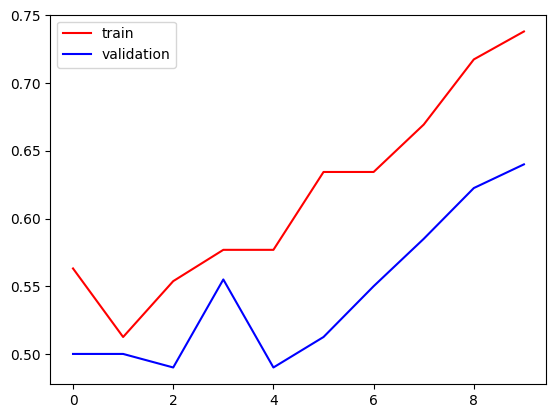

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'] , color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

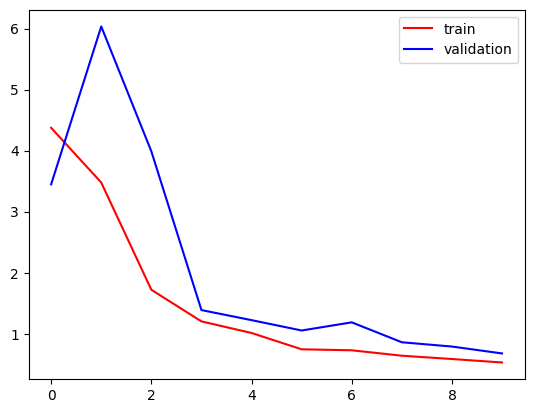

In [11]:
plt.plot(history.history['loss'],color ='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [13]:
import cv2

In [14]:
test_img = cv2.imread('/mnt/c/Users/risha/OneDrive/Desktop/ml/catVSdogClassification/archive/PetImages/dog_test.webp')

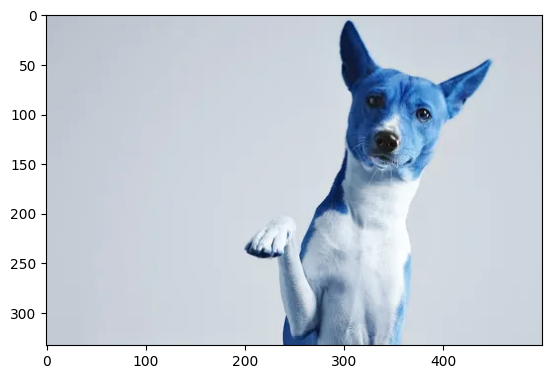

In [15]:
plt.imshow(test_img)

In [16]:
test_img.shape

(333, 500, 3)

In [17]:
test_img = cv2.resize(test_img,(256,256))

In [18]:
test_input = test_img.reshape((1,256,256,3))

In [19]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[1.]], dtype=float32)